## Capstone Project - Winonsin Breast Cancer Diagnosis Deep Learning Revisited






#### Import necessary libraries

In [51]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from sklearn.model_selection import ShuffleSplit

# Import sklearn.preprocessing.StandardScaler
from sklearn.preprocessing import MinMaxScaler

# Import supplementary visualizations code visuals.py
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

#### Load in WBCD dataset

In [52]:
# Load the Boston housing dataset
headers = ["ID","CT","UCSize","UCShape","MA","SECSize","BN","BC","NN","Mitoses","Diagnosis"]
data = pd.read_csv('breast-cancer-wisconsin.csv', names = headers)
data = data.reset_index(drop=True)

#### Handle missing data

In [53]:
data = data.replace('?', np.nan)
data = data.fillna(0)

#### Define a data generation function with random noise

In [54]:
def generateData(data):
    # make a copy of data
    data2 = data

    diagnosis2 = data2['Diagnosis']
    features2 = data2.drop(['ID','Diagnosis'], axis = 1)
    features2_headers = ["CT","UCSize","UCShape","MA","SECSize","BN","BC","NN","Mitoses"]

    mu, sigma = 0, 0.1 
    # creating a noise with the same dimension as the dataset 
    noise = np.random.normal(mu, sigma, features2.shape) 

    features2 = features2.apply(pd.to_numeric, errors='ignore')

    features2_with_noise = features2.add(pd.DataFrame(noise, columns = features2_headers), fill_value=0)

    data2 = pd.concat([features2_with_noise, pd.DataFrame(diagnosis2)], axis = 1)
    
    return data2

#### Add the new generated dataset into the existing dataset

In [55]:
new_data = generateData(data)
data = data.append(new_data, ignore_index=True)

new_data = generateData(data)
data = data.append(new_data, ignore_index=True)

print("data size = ", data.size)

('data size = ', 30756)


#### Scale dataset to the range of [0, 1]

In [56]:
# Initialize a scaler, then apply it to the features
scaler = MinMaxScaler()
numerical = ["Diagnosis","CT","UCSize","UCShape","MA","SECSize","BN","BC","NN","Mitoses"]
data[numerical] = scaler.fit_transform(data[numerical])

#### Separate Labels/Classes from Features

In [57]:
diagnosis = data['Diagnosis']
features = data.drop(['ID','Diagnosis'], axis = 1)

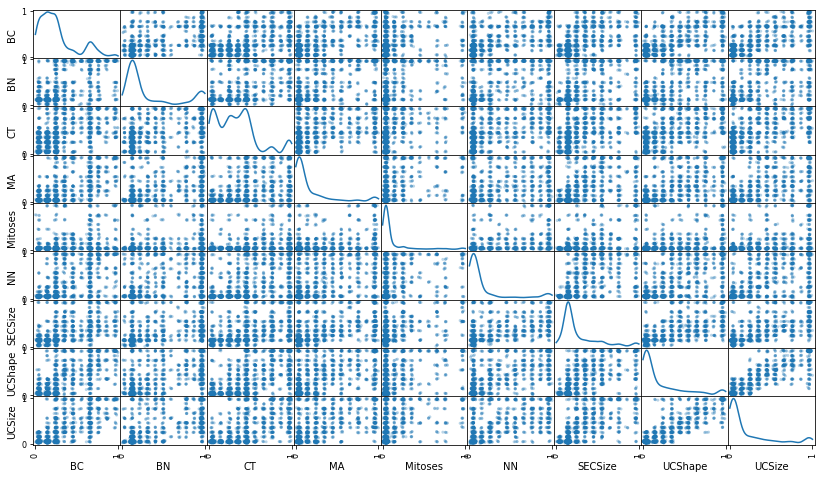

In [58]:
# Produce a scatter matrix for each pair of features in the data
pd.plotting.scatter_matrix(features, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

/anaconda/envs/deeplearning/lib/python2.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.


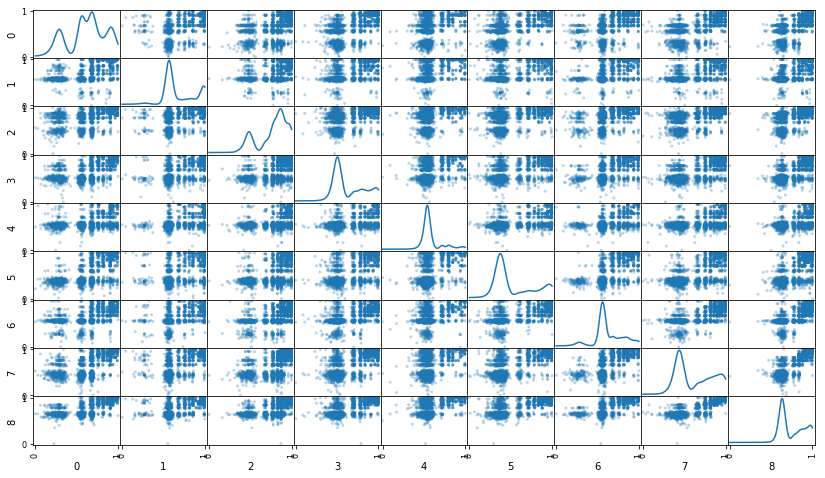

In [59]:
# Scale the data using the natural logarithm
log_features = features.copy()
for feature_name in log_features.columns:
    log_features[feature_name] = np.log(log_features[feature_name])
    
log_features = log_features.replace([np.inf, -np.inf], np.nan)
log_features = log_features.fillna(0)

# log_features = log_features.subtract(log_features.mean())

log_features = scaler.fit_transform(log_features)

# Produce a scatter matrix for each pair of newly-transformed features
pd.plotting.scatter_matrix(pd.DataFrame(log_features), alpha = 0.3, figsize = (14,8), diagonal = 'kde');

# convert numpy ndarray into Pandas DataFrame
features = pd.DataFrame(log_features)

#### Split dataset into training and testing datasets

In [60]:
from sklearn.model_selection import train_test_split

# Shuffle and split the data into training and testing subsets
X_train, X_test, y_train, y_test = train_test_split(features, diagnosis, test_size=0.25, random_state=42)

#### Reindex 

In [61]:
X_train = X_train.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)

#### Convert Pandas DataFrame to Numpy ndarray

In [62]:
X_train = X_train.values
y_train = y_train.values
X_test  = X_test.values
y_test  = y_test.values

#### Classify dataset using Random Forest Classifier

In [63]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(max_depth=2, random_state=0)
rfc.fit(X_train, y_train)
# y_predict = rfc.predict(X_test)

score = rfc.score(X_test, y_test)
print("score = ", score)

('score = ', 0.96709585121602293)


#### Deep learning

In [64]:
from keras.layers import Dense
from keras.layers import Dropout
from keras.models import Sequential
import keras
import keras.utils
from keras import utils as np_utils

Using TensorFlow backend.


#### Define NN Architecture

In [65]:
model = Sequential()

#Define your architecture.
model.add(Dense(9, activation='relu', input_dim=9))
model.add(Dropout(0.5))
model.add(Dense(5, activation='relu', input_shape=(9,)))
model.add(Dropout(0.5))
model.add(Dense(1, activation='relu', input_shape=(5,)))
model.add(Dense(1, activation='sigmoid'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 9)                 90        
_________________________________________________________________
dropout_1 (Dropout)          (None, 9)                 0         
_________________________________________________________________
dense_2 (Dense)              (None, 5)                 50        
_________________________________________________________________
dropout_2 (Dropout)          (None, 5)                 0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 6         
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 2         
Total params: 148
Trainable params: 148
Non-trainable params: 0
_________________________________________________________________


#### Compile NN Model

In [66]:
model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

#### Train NN Model

In [67]:
model.fit(X_train, y_train, epochs=100, batch_size=15) # tried epochs = 20, batch_size = 10

Epoch 1/100
2097/2097 [==============================] - 0s - loss: 0.6783 - acc: 0.6609     
Epoch 2/100
2097/2097 [==============================] - 0s - loss: 0.6646 - acc: 0.6633     
Epoch 3/100
2097/2097 [==============================] - 0s - loss: 0.6525 - acc: 0.6633     
Epoch 4/100
2097/2097 [==============================] - 0s - loss: 0.6375 - acc: 0.6633     
Epoch 5/100
2097/2097 [==============================] - 0s - loss: 0.6249 - acc: 0.6633     
Epoch 6/100
2097/2097 [==============================] - 0s - loss: 0.6112 - acc: 0.6633     
Epoch 7/100
2097/2097 [==============================] - 0s - loss: 0.5973 - acc: 0.6633     
Epoch 8/100
2097/2097 [==============================] - 0s - loss: 0.5755 - acc: 0.6633     
Epoch 9/100
2097/2097 [==============================] - 0s - loss: 0.5616 - acc: 0.6633     
Epoch 10/100
2097/2097 [==============================] - 0s - loss: 0.5381 - acc: 0.6633     
Epoch 11/100
2097/2097 [==============================] - 0

2097/2097 [==============================] - 0s - loss: 0.3285 - acc: 0.8398     
Epoch 88/100
2097/2097 [==============================] - 0s - loss: 0.3188 - acc: 0.8402     
Epoch 89/100
2097/2097 [==============================] - 0s - loss: 0.3227 - acc: 0.8498     
Epoch 90/100
2097/2097 [==============================] - 0s - loss: 0.3031 - acc: 0.8555     
Epoch 91/100
2097/2097 [==============================] - 0s - loss: 0.3280 - acc: 0.8445     
Epoch 92/100
2097/2097 [==============================] - 0s - loss: 0.3189 - acc: 0.8460     
Epoch 93/100
2097/2097 [==============================] - 0s - loss: 0.3187 - acc: 0.8464     
Epoch 94/100
2097/2097 [==============================] - 0s - loss: 0.3055 - acc: 0.8498     
Epoch 95/100
2097/2097 [==============================] - 0s - loss: 0.3202 - acc: 0.8450     
Epoch 96/100
2097/2097 [==============================] - 0s - loss: 0.3136 - acc: 0.8422     
Epoch 97/100
2097/2097 [==============================] - 0s - 

#### Test NN Model

In [68]:
score = model.evaluate(X_test, y_test, batch_size=10)
print("score = ", score)

699/699 [==============================] - 0s     
('score = ', [0.16552864176051982, 0.9713876907405935])
